In [56]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import matplotlib as mpl
from skimage import io, color, filters
from skimage.filters import sobel
from skimage.feature._canny import canny
from skimage.transform import resize, rotate
import pandas as pd 
from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage import data
from skimage.feature._canny import canny
import seaborn as sns
from PIL import Image
import cv2 as cv

In [186]:
import os

for dirname, _, filenames in os.walk('Alzheimer_s Dataset/train/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Alzheimer_s Dataset/train/.DS_Store
Alzheimer_s Dataset/train/ModerateDemented/moderateDem48.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem49.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem17.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem2.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem3.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem16.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem28.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem14.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem15.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem29.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem11.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem4.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem39.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem

Alzheimer_s Dataset/train/NonDemented/nonDem2500.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1009.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem2514.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem2272.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem752.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1753.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1035.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem2528.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1021.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1747.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem587.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem593.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1592.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1586.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem222.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem2064.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem65.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem544.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem71.jpg
Al

In [188]:
IMG_SIZE = (80, 80)
CHANNELS = 1
CHAR_PATH = 'Alzheimer_s Dataset/train/'
BATCH_SIZE = 32
EPOCHS = 20

In [189]:
CHAR_DICT = {}
for char in os.listdir(CHAR_PATH):
    CHAR_DICT[char] = len(os.listdir(os.path.join(CHAR_PATH, char)))
    
# sort keys based on len value descending order
CHAR_DICT = caer.sort_dict(CHAR_DICT, descending=True)
CHAR_DICT

NotADirectoryError: [Errno 20] Not a directory: 'Alzheimer_s Dataset/train/.DS_Store'

In [57]:
img = Image.open('Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')

In [97]:
def read_and_resize(file):
    img = io.imread(file)
    img = resize(img, (200, 200))
    return img

i1 = read_and_resize('Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')

In [136]:
n1 = read_and_resize('Alzheimer_s Dataset/train/NonDemented/nonDem0.jpg')

In [143]:
n1.shape

(200, 200)

In [123]:
i1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
i1.shape

(200, 200)

k means clustering 

In [125]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(i1)
dem2show = kmeans.cluster_centers_[kmeans.labels_]

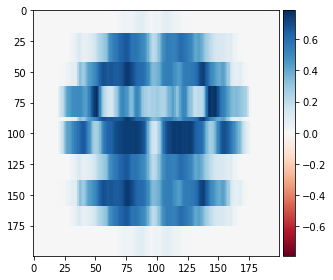

In [130]:
cluster_i1 = dem2show.reshape(i1.shape[0], i1.shape[1])
io.imshow(cluster_i1)

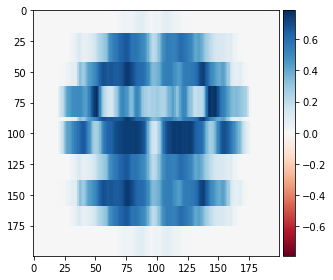

In [148]:
non2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_non = non2show.reshape(n1.shape[0], n1.shape[1])
io.imshow(cluster_non)

In [141]:
def apply_kmeans(image):
    # Getting a list of all RBG pixels in an image
    nrow, ncol = image.shape 
    lst_of_pixels = [image[irow][icol] for irow in range(nrow) for icol in range(ncol)]
    return lst_of_pixels


In [146]:
nd1 = apply_kmeans(n1)


Edge Detection 

In [180]:
def make_gray(img):
    img = color.rgb2gray(img)
    return img   

def apply_sobel(img):
    return filters.sobel(img)

def apply_canny(img):
    return feature.canny(img, sigma=2)

def restoration_bi(img):
    return restoration.denoise_bilateral(img, sigma_spatial=2)

def restoration_cham(img):
    return restoration.denoise_tv_chambolle(img, weight=.2)

images = [i1, n1]


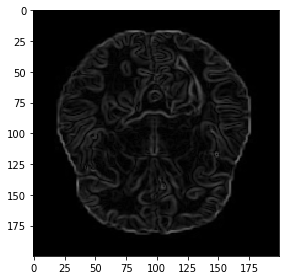

In [170]:
n_sobel = apply_sobel(n1)
io.imshow(n_sobel)

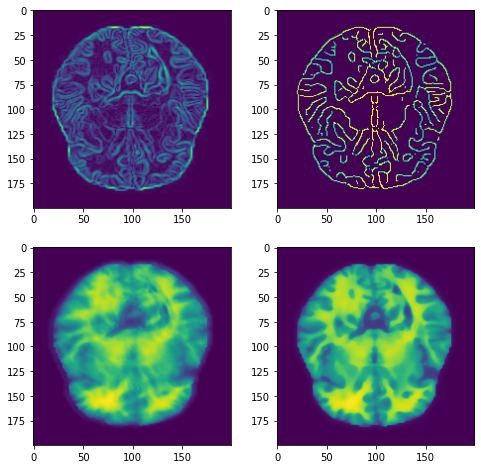

In [183]:
def graph_filters(img):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx])
    plt.show()
    
graph_filters(non_dems)

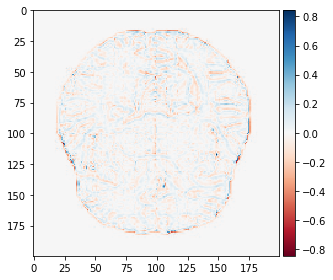

In [159]:
n_laplace = laplace(n1)
io.imshow(n_laplace)

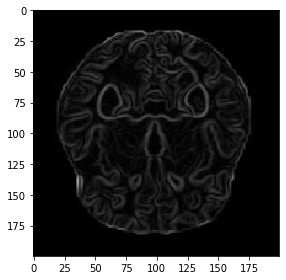

In [154]:
i_sobel = apply_sobel(i1)
io.imshow(i_sobel)

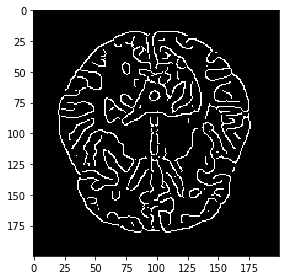

In [103]:
n_canny = apply_canny(n1)
io.imshow(n_canny)

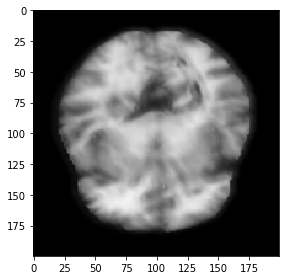

In [181]:
n_rest_bi = restoration_bi(n1)
io.imshow(n_rest_bi)

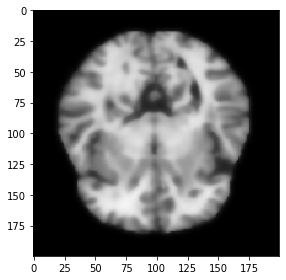

In [182]:
n_rest_cham = restoration_cham(n1)
io.imshow(n_rest_cham)

In [149]:
non_dems = [n_sobel, n_canny, n_rest_bi, n_rest_cham]

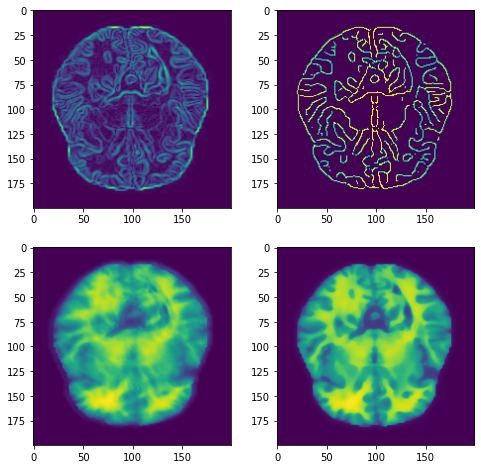

In [151]:
def graph_filters(img):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx])
    plt.show()
    
graph_filters(non_dems)

In [90]:
i_rest_bi = restoration_bi(i1)
i_rest_cham = restoration_cham(i1)

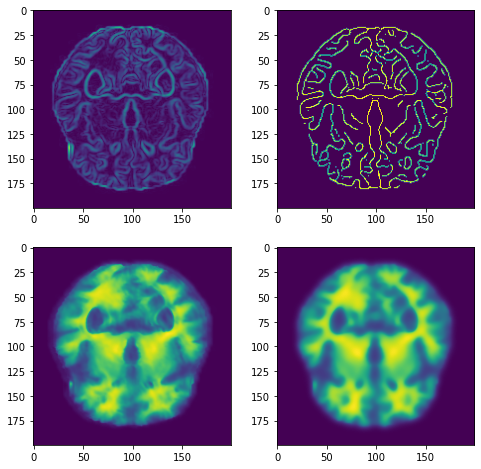

In [156]:
dem = [i_sobel, i_canny, i_rest_bi, i_rest_cham]
graph_filters(dem)

In [91]:
i_canny = apply_canny(i1)

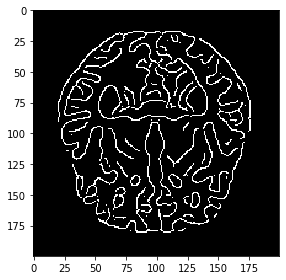

In [92]:
io.imshow(i_canny)



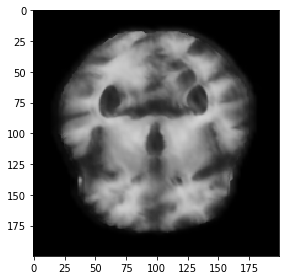

In [93]:
io.imshow(i_rest_bi)

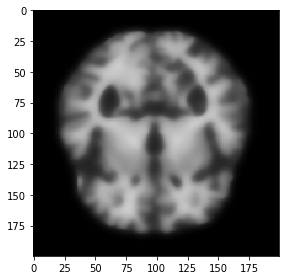

In [96]:
io.imshow(i_rest_cham)

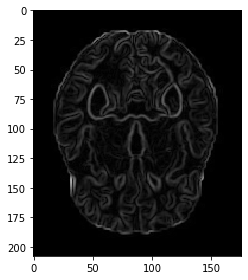

In [30]:
sobel_img = filters.sobel(img)
io.imshow(sobel_img);

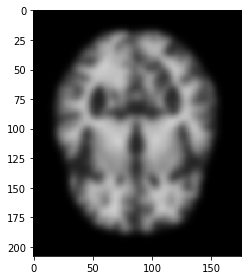

In [33]:
from skimage.filters import gaussian
io.imshow(gaussian(d1, sigma=3));

In [10]:
d1 = io.imread('Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')

In [35]:
d2 = io.imread('Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg')

In [11]:
d1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
d1.shape

(208, 176)

In [37]:
d2.shape

(208, 176)

In [22]:
non_dem = io.imread_collection('Alzheimer_s Dataset/train/ModerateDemented')

Alzheimer_s Dataset/train/.DS_Store
Alzheimer_s Dataset/train/ModerateDemented/moderateDem48.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem49.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem17.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem2.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem3.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem16.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem28.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem14.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem15.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem29.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem11.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem4.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem39.jpg
Alzheimer_s Dataset/train/ModerateDemented/moderateDem

Alzheimer_s Dataset/train/NonDemented/nonDem184.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1813.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem812.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1185.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem2498.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1191.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem806.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1378.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem351.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem437.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem2117.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem2103.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem423.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem345.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1344.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1422.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1436.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem1350.jpg
Alzheimer_s Dataset/train/NonDemented/nonDem379.jpg
A

In [185]:
non_demented = np.load('Alzheimer_s Dataset/train/NonDemented')

IsADirectoryError: [Errno 21] Is a directory: 'Alzheimer_s Dataset/train/NonDemented'

In [11]:
nondem1_values = np.ravel(d1)
nondem1_values.shape

(36608,)

In [15]:
def plot_values_histogram():
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111) 
    ax.hist(nondem1_values, bins=256) 
    ax.set_xlabel('Pixel Intensities', fontsize=14) 
    ax.set_ylabel('Frequency in Image', fontsize=14) 
    ax.set_title("Image Histogram", fontsize=16);

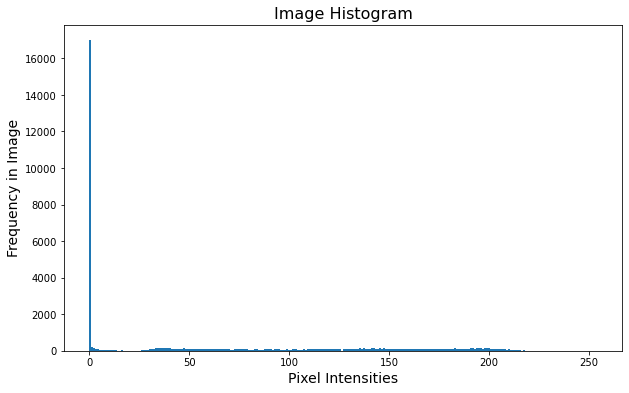

In [17]:
plot_values_histogram()

In [20]:
def plot_images(imgs, save_title='imgs.png', show = False):
    '''
    Input: Dictionary of images, plotting options. 
    Output: Plot of 2-4 images.  
    '''
    
#     if len(imgs) == 2:
#         fig, axs = plt.subplots(1,2, figsize=(8, 8))
#     elif len(imgs) == 4:
#         fig, axs = plt.subplots(2,2, figsize=(8, 8))
#     else:
#         raise ValueError("Plot function requires 2 or 4 items.")
    for ax, k, v in zip(axs.flatten(), imgs.keys(), imgs.values()): 
        ax.imshow(v, cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('Image ' + k)
    fig.savefig(save_title)
    if show: 
        plt.show()

In [157]:
#logistic regression 